<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/ml_ex_12_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Модуль 1: Предобработка данных и визуализация зависимостей**

In [28]:
import pandas as pd
import seaborn as sns

In [51]:
df = pd.read_excel("/content/ml__12.12.xlsx")
df #чтение файла

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,2017-11-01,11\n20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4963,4964,WSR/1.-1751/2017,2017-11-01,ТС-1164/06\n31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4964,4965,WSR/1.-1748/2017,2017-11-01,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4965,4966,WSR/1.-1747/2017,2017-11-01,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


**1.2 Разбиение сложных атрибутов**

In [52]:
raw_data = df['Исх. №\nДата'].str.split('\n').tolist()

numbers = []
dates = []
for item in raw_data:
  numbers.append(item[0])
  dates.append(item[1] if len(item) == 2 else None)

df['номер из документа'] = numbers
df['дата из документа'] = dates
df #разбиваем Исх. №\nДата

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание,номер из документа,дата из документа
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN,208-409,08.04.2019
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN,05-338,09.04.2019
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN,И10-14/3137,09.04.2019
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN,Д2/7121-ИС,03.04.2019
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN,15-20/06-911,08.04.2019
...,...,...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,2017-11-01,11\n20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN,11,20.10.2017
4963,4964,WSR/1.-1751/2017,2017-11-01,ТС-1164/06\n31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN,ТС-1164/06,31.10.2017
4964,4965,WSR/1.-1748/2017,2017-11-01,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN,ЛО-95/06пр,None
4965,4966,WSR/1.-1747/2017,2017-11-01,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN,ЛО-93/06пр,24.10.2017


**Описание:**

Нам надо было разбить такие поля на несколько других, я выбрала колонку "Исх. №\nДата" и разделила на "номер из документа"	и "дата из документа"

**1.1 Предобработка данных и выделение значимых атрибутов** (Определить адресата для входящих документов)

**Описание:**

Так как нам нужно определить какие атрибуты имеют наибольшее влияние на классификацию входящих документов и оставить только их для последующего обучения, ярешила что нам не нужно знать '№ п/п', 'Дата\nрегистрации', 'Исх. №\nДата', '№\nдокумента', 'Примечание','дата из документпа',	'дата из документа'. Поэтому мы их удаляем

In [53]:
df = df.drop(['№ п/п', 'Дата\nрегистрации', 'Исх. №\nДата', '№\nдокумента', 'Примечание', 'номер из документа',	'дата из документа'], axis=1)
df #удаляем не нужные столбцы

,Адресат,Автор,Краткое\nсодержание
0,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
...,...,...,...
4962,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...
4963,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...
4964,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...
4965,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...


**Описание:**

Удаление ненужных мне данных я произвела после разбиения атрибутов, тк это было бы не возможно после обработки данных

**1.3 Дополнение недостающими данными**

Предположим, что можно сделать так:

1. Создаем словарь с названиями тех организация, из которых письма идут сразу к Генеральному Директору. Также смотрим по вопросам исполнения. Например, если в столбце "Организация" предложение начинается с "Министерство", то однозначно письмо идет к Генеральному Директору
2. Можно сделать так:
df['Статус_отправителя'] = df['Автор'].apply(lambda x: 'Первое лицо' if 'Министерство' in x else 'Другое лицо')

3. Далее категориальные данные преобразуем в числовые с помощью get_dummies и строим модель

**1.4 Визуализация зависимостей данных** (визуализируйте зависимости атрибутов в наборе данных)

<Axes: xlabel='Адресат', ylabel='count'>

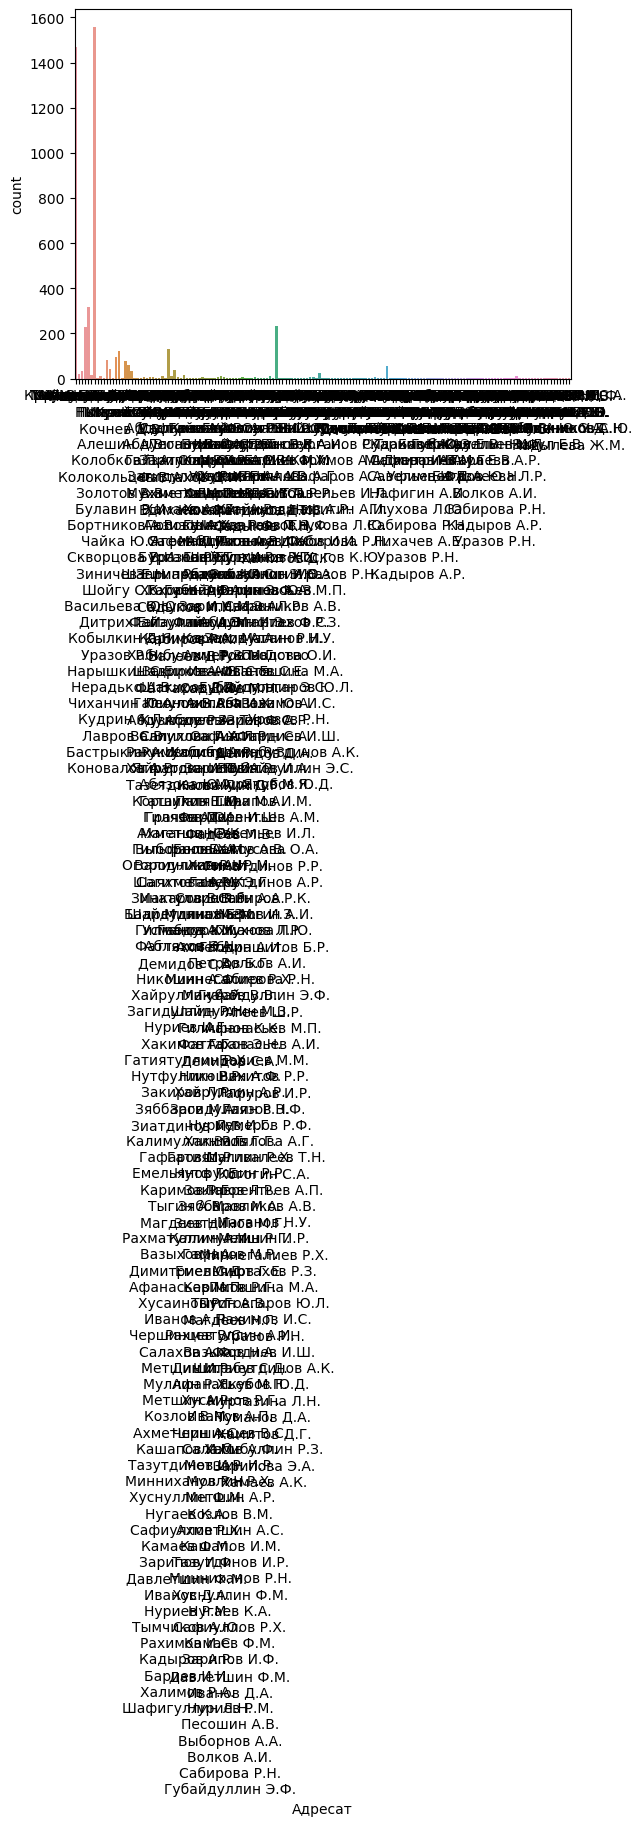

In [29]:
sns.countplot(data=df, x='Адресат')

**Описание:**

Я построила countplot, что бы посмотреть сколько раз наш адресат фигурирует в базе данных, и увидела что есть большое количество адресатов, которые мало фигурируют, которые никак нам не помогут

In [45]:
from collections import Counter

c = Counter(df.Адресат.tolist())

unique_reciver = []

for key, value in c.items():
  if value > 20:
    unique_reciver.append(key) #выявление адресатов >20

[Text(0, 0, 'Уразов Р.Н.'),
 Text(1, 0, 'Иванюк Л.А.'),
 Text(2, 0, 'Миронова С.В.'),
 Text(3, 0, 'Тымчиков А.Ю.'),
 Text(4, 0, 'Крайчинская С.Б.'),
 Text(5, 0, 'Глушко Д.Е.'),
 Text(6, 0, 'Митяева И.В.'),
 Text(7, 0, 'Мухаметзянов Д.Ф.'),
 Text(8, 0, 'Саликова К.В.'),
 Text(9, 0, 'Куколев С.В.'),
 Text(10, 0, 'Гонтарь М.А.'),
 Text(11, 0, 'Недоспасова О.В.'),
 Text(12, 0, 'Глушко Д.Е.\nТымчиков А.Ю.'),
 Text(13, 0, 'Никул Е.В.'),
 Text(14, 0, 'Уфимцев Д.А.'),
 Text(15, 0, 'Лысова С.И.'),
 Text(16, 0, 'Суперекин И.Ю.'),
 Text(17, 0, 'Хворостяная И.В.')]

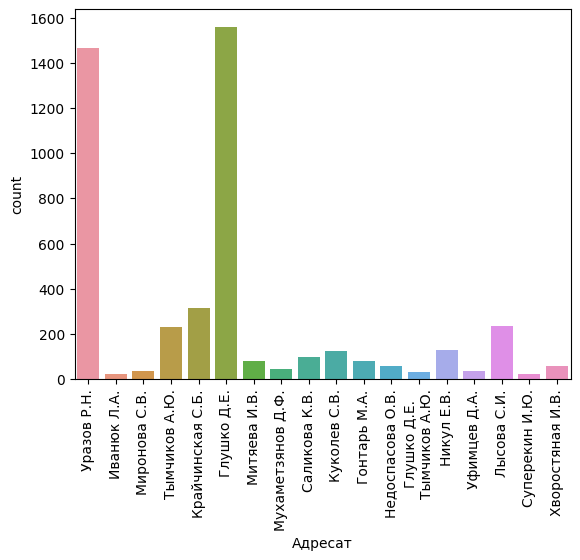

In [48]:
my_plot  = sns.countplot(data=df[df.Адресат.isin(unique_reciver)], x='Адресат')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

**Описание:**

Я показала тех адресатов, которые фигурируют в БД больше 20 раз

Всех, кто меньше мы принимаем за выбросы, тк они не представляют для нас никакого значения (мало информативны)

In [56]:
from sklearn.feature_extraction.text import  TfidfVectorizer


corpus = df['Краткое\nсодержание'].to_list()

tfidf_vectorizer = TfidfVectorizer()

In [63]:
X_tfidf_vectorizer = tfidf_vectorizer.fit_transform(corpus).toarray()
X_tfidf_vectorizer

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Описание:**
Сделала векторизацию краткого содержания

**Модуль 2: Построение модели машинного обучения**



**2.1 Классификация документов**

In [81]:
from sklearn.preprocessing import LabelEncoder
corpus = df['Адресат'].to_list()
labelEncoder_vectorizer = LabelEncoder()

In [82]:
Y_labelEncoder_vectorizer = labelEncoder_vectorizer.fit_transform(corpus)
Y_labelEncoder_vectorizer

array([143, 143, 143, ..., 143, 143, 143])

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vectorizer, Y_labelEncoder_vectorizer, test_size=0.33, random_state=42)

In [84]:
X_train.shape

(3327, 5422)

In [85]:
X_test.shape

(1640, 5422)

**Описание:**
Разделила исходный набор данных на обучающую и тестирующую выборки.

**2.2 Обучение**

In [86]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6560975609756098

In [90]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6213414634146341

In [92]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6091463414634146

**Описание:**

Использовала 3 модели и по показателям точности работы, видно что, 1 модель является точной

Первая модель предсказывает 65% на тестовой выборке

In [93]:
from google.colab import files
df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>